# Final Project | $SpendWise$  

Batch FTDS-RMT-036  

Group 001  

Team members:  
- Azkia Mudrikah Al Mawaddah as Data Analyst  
- Ediashta Narendra Amarussalam as Data Scientist  
- Muchammad Septyo Al Birqi Purnama as Data Scientist  
- Yocia Meiko Oke as Data Engineer

HuggingFace : [Group1 Deployment](https://huggingface.co/spaces/ymo980/spendwise)  
Original Dataset : [Group1 Dataset](https://data.mendeley.com/datasets/wkjdmrmrg4/4)  
Team GitHub : [Group1 GitHub](https://github.com/FTDS-assignment-bay/p2-final-project-ftds-036-rmt-group-001) 

# 01 Objective

## i. Background   

Paylater merupakan sumber pendapatan tambahan (extended revenue stream) yang berasal dari ekosistem yang telah matang, seperti e-commerce atau layanan ojek online beserta turunannya. Dengan menentukan apakah pelanggan yang sudah ada dalam ekosistem tersebut akan memanfaatkan layanan paylater atau tidak, keuntungan dapat diperoleh tanpa biaya tambahan untuk akuisisi pelanggan (non-profit pada customer acquisition) dan dengan efisiensi biaya pemasaran serta profit pada communication cost.

## ii. Problem statement and objectives  

$SpendWise$ bertujuan untuk menentukan apakah existing customer akan menggunakan produk layanan PayLater atau tidak, berdasarkan dengan kondisi demografis serta kebiasaan berbelanja konsumen. Model machine learning akan dibuat menggunakan algoritma KNN, SVM, decision tree, random forest, dan adaptive boosting. Kelima model tersebut akan diuji pada data train dan data test, lalu dibandingkan berdasarkan metrik evaluasi recall dan F1-score. Model dengan nilai recall dan F1-score terbaik akan dipilih untuk disimpan dan digunakan dalam memprediksi data baru. Pemilihan metrik recall bertujuan untuk memastikan model mampu mendeteksi sebanyak mungkin kasus positif yang sebenarnya, sehingga meminimalkan risiko kesalahan dalam klasifikasi data kritis. Sementara itu, F1-score dipilih karena menggabungkan keseimbangan antara presisi dan recall, memastikan model tidak hanya akurat tetapi juga dapat diandalkan dalam mendeteksi risiko secara konsisten.

# 02 Import Libraries

In [1]:
#Primary Libraries
import pandas as pd  
import seaborn as sns  
import numpy as np  
import matplotlib.pyplot as plt  
import phik

#Feature Engineering & Classification Modeling Related
from scipy.stats import chi2_contingency  # Untuk uji chi-square pada tabel kontingensi.
from imblearn.over_sampling import SMOTE, SMOTENC  # Untuk mengatasi data tidak seimbang dengan oversampling.
from sklearn.linear_model import LogisticRegression  # Model regresi logistik untuk klasifikasi biner.
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi set pelatihan dan pengujian.
from sklearn.metrics import (  # Untuk mengevaluasi kinerja model.
    classification_report,  # Laporan klasifikasi dengan precision, recall, dll.
    f1_score,  # Menghitung f1-score untuk menilai keseimbangan antara precision dan recall.
    roc_auc_score,  # Menghitung AUC dari kurva ROC.
    confusion_matrix,  # Matriks kebingungan untuk melihat performa model.
    accuracy_score,  # Menghitung akurasi model.
    ConfusionMatrixDisplay  # Untuk menampilkan matriks kebingungan secara visual.
)
from sklearn.preprocessing import (  # Untuk mempersiapkan data sebelum pelatihan model.
    StandardScaler,  # Menstandarisasi fitur (rata-rata 0, deviasi standar 1).
    OneHotEncoder,  # Mengubah fitur kategori menjadi representasi biner.
    LabelEncoder,  # Mengubah label kategori menjadi angka.
    OrdinalEncoder,  # Mengubah fitur kategori menjadi angka dengan urutan.
    MinMaxScaler,  # Mengubah fitur ke rentang [0, 1].
    PowerTransformer
)

# from category_encoders import TargetEncoder
from feature_engine.outliers import Winsorizer  # Untuk menangani outlier dengan membatasi nilai ekstrim.
from sklearn.pipeline import Pipeline, make_pipeline  # Untuk mengatur serangkaian langkah pemrosesan dan model.
from sklearn.impute import SimpleImputer  # Untuk mengisi nilai yang hilang dalam dataset.
from sklearn.compose import ColumnTransformer  # Untuk menerapkan transformasi berbeda pada kolom yang berbeda.
from sklearn.feature_selection import SelectPercentile  # Untuk memilih fitur berdasarkan skor tertentu.

#Display Setting
pd.set_option('display.max_colwidth', None)             # while column display need to be expanded 
import warnings 
warnings.filterwarnings('ignore')                       # for not displaying warning outputs

from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 03 Data Loading

In [2]:
df_ori = pd.read_csv('initial_cleaning_rounded.csv')
df = df_ori.copy()
df.head()

,ID,Gender,Location,E-Paylater User Status,Educational Background,Year of Birth,Job Status,Monthly Income,Online Shopping Expenditure Percentage,Impulsive Buying Behavior Score,Promotion Score,Social Influence Score,Happiness Score,Self Control Score,Normative Evaluation Score
0,1,Female,West Sumatera,Non e-paylater user,Bachelor/Diploma IV,1997,Working,"Rp 2,500,001 - Rp 5,000,000",Less than 20%,2,3,2,4,4,3
1,2,Male,DKI Jakarta,e-paylater user,Until Senior High School,2002,Students,"Rp 1,000,001 - Rp 2,500,000",21% - 40%,2,3,2,4,3,5
2,3,Male,West Sumatera,Non e-paylater user,Until Senior High School,2002,Students,"Rp 1,000,001 - Rp 2,500,000",Less than 20%,3,3,3,4,3,3
3,4,Female,West Sumatera,e-paylater user,Bachelor/Diploma IV,2002,Students,"Less than Rp 1,000,000",Less than 20%,4,4,4,4,2,1
4,5,Male,West Sumatera,e-paylater user,Bachelor/Diploma IV,2002,Working,"More than Rp 10,000,000",Less than 20%,1,2,2,3,3,3


In [3]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      810 non-null    int64 
 1   Gender                                  810 non-null    object
 2   Location                                810 non-null    object
 3   E-Paylater User Status                  810 non-null    object
 4   Educational Background                  810 non-null    object
 5   Year of Birth                           810 non-null    int64 
 6   Job Status                              810 non-null    object
 7   Monthly Income                          810 non-null    object
 8   Online Shopping Expenditure Percentage  810 non-null    object
 9   Impulsive Buying Behavior Score         810 non-null    int64 
 10  Promotion Score                         810 non-null    int64 
 11  Social

Columns values data type:

1. Kategorikal (Nominal)
- Gender
- Location
- E-Paylater User Status
- Job Status
2. Kategorikal (Ordinal)
- Educational Background
- Monthly Income
- Online Shopping Expenditure Percentage
- Impulsive Buying Behavior Score
- Promotion Score
- Social Influence Score
- Happiness Score
- Self Control Score
- Normative Evaluation Score
3. Numerikal 
- ID
- Year of Birth

In [4]:
#check duplicated
df.duplicated().sum()

0

> we have no duplicated value

In [5]:
#missing value
df.isnull().sum()

ID                                        0
Gender                                    0
Location                                  0
E-Paylater User Status                    0
Educational Background                    0
Year of Birth                             0
Job Status                                0
Monthly Income                            0
Online Shopping Expenditure Percentage    0
Impulsive Buying Behavior Score           0
Promotion Score                           0
Social Influence Score                    0
Happiness Score                           0
Self Control Score                        0
Normative Evaluation Score                0
dtype: int64

> also, there isnt any missing value

# 03 EDA

In [6]:
eda_categorical = df[[ 'Gender', 'Location', 'E-Paylater User Status', 'Year of Birth', 'Job Status', 'Monthly Income', 'Online Shopping Expenditure Percentage', 'Impulsive Buying Behavior Score', 'Promotion Score', 'Social Influence Score', 'Happiness Score', 'Self Control Score', 'Normative Evaluation Score']]
eda_numerical = df[['ID', 'Year of Birth']]

In [7]:
eda_categorical

,Gender,Location,E-Paylater User Status,Year of Birth,Job Status,Monthly Income,Online Shopping Expenditure Percentage,Impulsive Buying Behavior Score,Promotion Score,Social Influence Score,Happiness Score,Self Control Score,Normative Evaluation Score
0,Female,West Sumatera,Non e-paylater user,1997,Working,"Rp 2,500,001 - Rp 5,000,000",Less than 20%,2,3,2,4,4,3
1,Male,DKI Jakarta,e-paylater user,2002,Students,"Rp 1,000,001 - Rp 2,500,000",21% - 40%,2,3,2,4,3,5
2,Male,West Sumatera,Non e-paylater user,2002,Students,"Rp 1,000,001 - Rp 2,500,000",Less than 20%,3,3,3,4,3,3
3,Female,West Sumatera,e-paylater user,2002,Students,"Less than Rp 1,000,000",Less than 20%,4,4,4,4,2,1
4,Male,West Sumatera,e-paylater user,2002,Working,"More than Rp 10,000,000",Less than 20%,1,2,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,Male,West Sumatera,Non e-paylater user,1989,Students,"Less than Rp 1,000,000",Less than 20%,4,4,3,3,4,3
806,Male,West Sumatera,Non e-paylater user,2003,Students,"Less than Rp 1,000,000",Less than 20%,3,4,4,3,3,2
807,Female,West Sumatera,Non e-paylater user,2002,Entrepreneur,"Rp 1,000,001 - Rp 2,500,000",Less than 20%,2,2,3,4,3,3
808,Female,West Sumatera,Non e-paylater user,2003,Students,"Less than Rp 1,000,000",Less than 20%,2,4,4,4,4,4


In [8]:
eda_numerical

,ID,Year of Birth
0,1,1997
1,2,2002
2,3,2002
3,4,2002
4,5,2002
...,...,...
805,806,1989
806,807,2003
807,808,2002
808,809,2003


In [9]:
#describe numerical
eda_numerical.describe()

,ID,Year of Birth
count,810.000000,810.000000
mean,405.500000,1994.111111
std,233.971152,10.020745
min,1.000000,1966.000000
25%,203.250000,1987.000000
50%,405.500000,1999.000000
75%,607.750000,2002.000000
max,810.000000,2005.000000


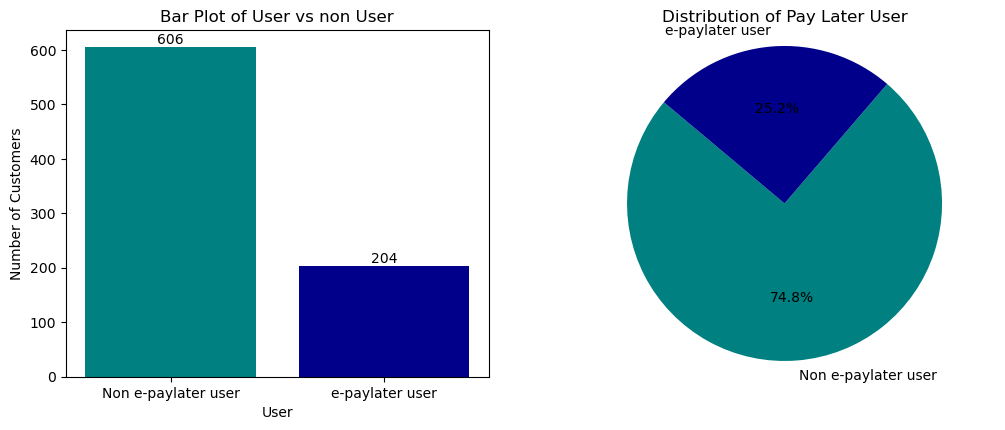

In [10]:
user_count = df['E-Paylater User Status'].value_counts().sort_index()

# Define a color palette
colors = ["teal", "darkblue"]

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))

# Bar plot
bars = axs[0].bar(user_count.index.astype(str), user_count.values, color=colors)
axs[0].set_title('Bar Plot of User vs non User')
axs[0].set_xlabel('User')
axs[0].set_ylabel('Number of Customers')

# Add amounts on top of each bar with matching color
for bar, color in zip(bars, colors):
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), ha='center', va='bottom')

# Pie chart
axs[1].pie(user_count, labels=user_count.index.astype(str), autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Distribution of Pay Later User')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

plt.show()

> due our data imbalance, we need to do balancing soon

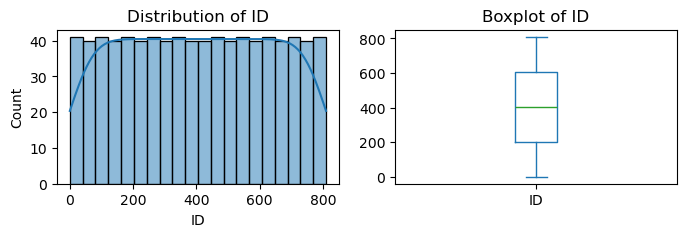

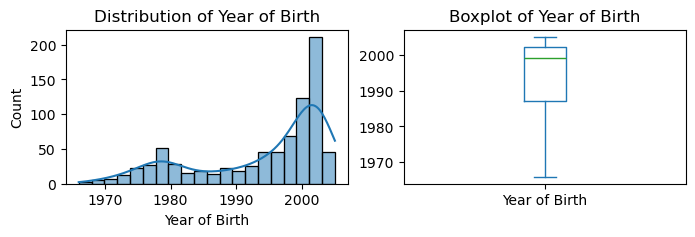

In [11]:
#plotting
for col in eda_numerical:
   #set canvas
    plt.figure(figsize=(8,2))
    # Plot histogram for the column
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True,bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col}')

    # Plot boxplot for the column
    plt.subplot(1,2,2)
    df[col].plot(kind='box')
    plt.title(f"Boxplot of {col}")
        
    # Show
    plt.show()

interval columns not set, guessing: ['ID', 'Year of Birth', 'Impulsive Buying Behavior Score', 'Promotion Score', 'Social Influence Score', 'Happiness Score', 'Self Control Score', 'Normative Evaluation Score']


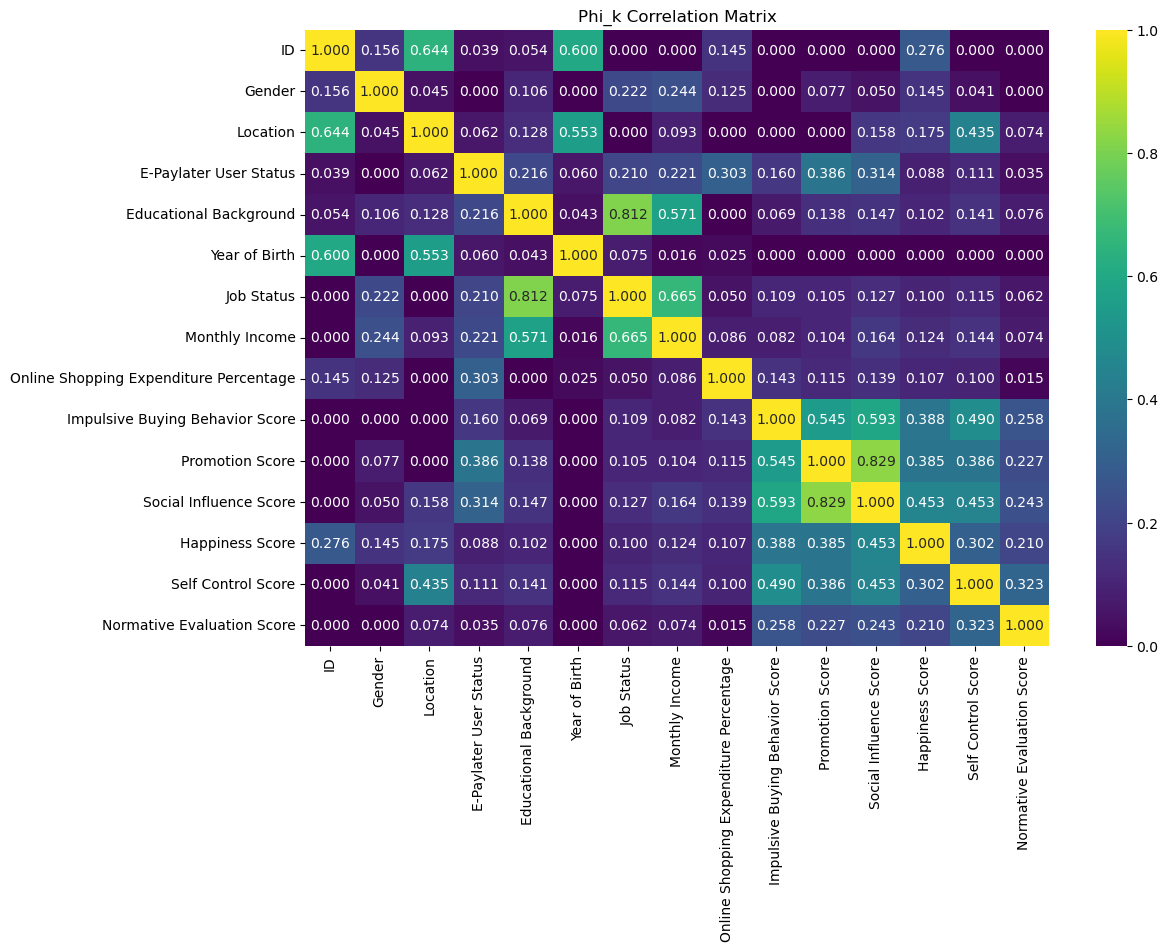

In [12]:
# Step 1: Compute the Phi_k correlation matrix
phik_corr_matrix = df.phik_matrix()

# Step 2: Plot the heatmap using seaborn with Viridis color palette
plt.figure(figsize=(12, 8))
sns.heatmap(phik_corr_matrix, annot=True, cmap='viridis', fmt=".3f")
plt.title("Phi_k Correlation Matrix")
plt.show()

# 04 Feature Engineering

## 04.1 Split Feature and Target

In [13]:
X = df.drop(['E-Paylater User Status'], axis=1)
y = df['E-Paylater User Status'].map({'Non e-paylater user':0, 'e-paylater user':1 })
X.head()

,ID,Gender,Location,Educational Background,Year of Birth,Job Status,Monthly Income,Online Shopping Expenditure Percentage,Impulsive Buying Behavior Score,Promotion Score,Social Influence Score,Happiness Score,Self Control Score,Normative Evaluation Score
0,1,Female,West Sumatera,Bachelor/Diploma IV,1997,Working,"Rp 2,500,001 - Rp 5,000,000",Less than 20%,2,3,2,4,4,3
1,2,Male,DKI Jakarta,Until Senior High School,2002,Students,"Rp 1,000,001 - Rp 2,500,000",21% - 40%,2,3,2,4,3,5
2,3,Male,West Sumatera,Until Senior High School,2002,Students,"Rp 1,000,001 - Rp 2,500,000",Less than 20%,3,3,3,4,3,3
3,4,Female,West Sumatera,Bachelor/Diploma IV,2002,Students,"Less than Rp 1,000,000",Less than 20%,4,4,4,4,2,1
4,5,Male,West Sumatera,Bachelor/Diploma IV,2002,Working,"More than Rp 10,000,000",Less than 20%,1,2,2,3,3,3


In [14]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: E-Paylater User Status, dtype: int64

## 04.2 Split Train and Test Set


In [15]:
#splitting x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print (f"Train size : {X_train.shape}")
print (f"Test size : {X_test.shape}")

Train size : (648, 14)
Test size : (162, 14)


## 04.3 Outlier Check

In [16]:
#get X_train_num columns, and making sure thera are no 'object' data types on X_train_num
X_train_num = X_train[['ID','Year of Birth']]

# Skewness check
skewness = pd.DataFrame({
    'column name': X_train_num.columns,  # Hanya nama kolom
    'skewness_score': [round(X_train_num[col].skew(), 1) for col in X_train_num.columns],
    'distribution': [
        'normal' if -0.5 <= round(X_train_num[col].skew(), 1) <= 0.5 
        else 'skewed' if (0.5 < round(X_train_num[col].skew(), 1) <= 1) or (-1 <= round(X_train_num[col].skew(), 1) < -0.5) 
        else 'extremely skewed'
        for col in X_train_num.columns
    ]
})

skewness

,column name,skewness_score,distribution
0,ID,0.0,normal
1,Year of Birth,-0.9,skewed


In [17]:
#make a function to analyze lower and upper boundary for numerical column
def limit_count(col, distype):
    if distype == 'skewed':
        IQR = X_train_num[col].quantile(0.75) - X_train_num[col].quantile(0.25)
        lower = X_train_num[col].quantile(0.25) - (IQR * 3)
        upper = X_train_num[col].quantile(0.75) + (IQR * 3)
    else:
        lower = X_train_num[col].mean() - 3*X_train_num[col].std()
        upper = X_train_num[col].mean() + 3*X_train_num[col].std()
    return lower, upper

#finds outlier and show the number of percentage of them
outliers = pd.DataFrame({
    'column':skewness['column name'],
    'distribution':skewness['distribution'],
    'lower_boundary':[round(limit_count(col, distype)[0],2) for col, distype in zip(skewness['column name'], skewness['distribution'])],
    'upper_boundary':[round(limit_count(col, distype)[1],2) for col, distype in zip(skewness['column name'], skewness['distribution'])],
    'persentase':[
        round(((X_train_num[col] > upper).sum() + (X_train_num[col] < lower).sum()) / len(X_train_num) *100, 2)
        for col, dist in zip(skewness['column name'], skewness['distribution'])
        for lower, upper in [limit_count(col, dist)]
    ]
})
outliers

,column,distribution,lower_boundary,upper_boundary,persentase
0,ID,normal,-293.44,1100.83,0.0
1,Year of Birth,skewed,1938.00,2050.00,0.0


> there isnt any outlier in entire numerical columns

## 04.4 Feature Selection

In [18]:
from scipy.stats import pearsonr, chi2_contingency, randint
from scipy.stats import shapiro

> our data are sized below 5000, so we use shapiro wilk to asses the normality

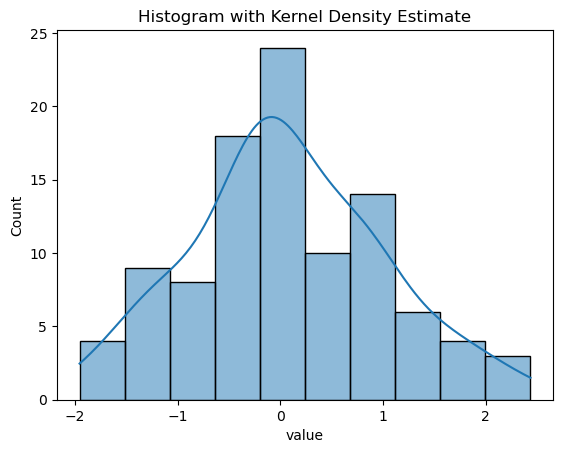

Statistic: 0.9891151307196002, p-value: 0.593647618674838
Data is normally distributed (fail to reject H0)


In [19]:
#Normality test
data = np.random.normal(loc=0, scale=1, size=100)  # Generate normally distributed data
normality_df = pd.DataFrame(data, columns=['value'])

# Visualize the distribution
sns.histplot(normality_df['value'], kde=True)
plt.title('Histogram with Kernel Density Estimate')
plt.show()

# Check for normality
stat, p_value = shapiro(normality_df['value'])
print(f'Statistic: {stat}, p-value: {p_value}')

if p_value > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is not normally distributed (reject H0)")

In [20]:
# Remove ID from numerical columns (it's not a true numerical feature)
num_cols = ['Year of Birth']  # Only keep Year of Birth as numerical
# All other columns are categorical
cat_cols = [col for col in X_train.columns if col not in num_cols and col != 'ID']  # Exclude 'ID' from both lists

results = []  # Empty list to save our correlation analysis result

# For numerical columns, check for constant values before calculating correlation
for col in num_cols:
    if X_train[col].nunique() > 1:  # Check if the column has more than one unique value
        p_value = pearsonr(X_train[col], y_train)[1]
        p_value_text = 'Correlated' if p_value < 0.05 else 'Not Correlated'
    else:
        p_value_text = 'Not Correlated'  # Indicate that the input is constant
    results.append((col, p_value_text))

# For categorical columns, we'll use chi-square to find the correlation
for col in cat_cols:
    contingency_table = pd.crosstab(X_train[col], y_train)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    p_value_text = 'Correlated' if p_value < 0.05 else 'Not Correlated'
    results.append((col, p_value_text))

# Save the result into a DataFrame for easier reading
result_df = pd.DataFrame(results, columns=['Column Name', 'Result'])
result_df

,Column Name,Result
0,Year of Birth,Not Correlated
1,Gender,Not Correlated
2,Location,Not Correlated
3,Educational Background,Correlated
4,Job Status,Correlated
5,Monthly Income,Correlated
6,Online Shopping Expenditure Percentage,Correlated
7,Impulsive Buying Behavior Score,Correlated
8,Promotion Score,Correlated
9,Social Influence Score,Correlated


> kolom id tidak diperhitungkan dalam korelasi

In [21]:
X_train = X_train.drop(columns = ['ID','Year of Birth','Happiness Score','Normative Evaluation Score','Gender','Location'])
X_test = X_test.drop(columns = ['ID','Year of Birth','Happiness Score','Normative Evaluation Score','Gender','Location'])

>ada 5 feature yang didrop karena tidak ada korelasi, termasuk 'ID'

## 04.5 Cardinality Check & Handling

>semua kolom yang digunakan dalam feature adalah kategorikal, sehingga dilakukan cardinality check pada semua feature yang digunakan

In [22]:
# Define the columns to exclude
excluded_columns = ['ID', 'Year of Birth', 'Happiness Score', 'Normative Evaluation Score', 'Gender', 'Location']

# Identify categorical columns (all except excluded columns)
categorical_columns = [col for col in df.columns if col not in excluded_columns]

# Check cardinality of each categorical column
cardinality = {col: df[col].nunique() for col in categorical_columns}

# Print the cardinality results
for col, count in cardinality.items():
    print(f"Cardinality of '{col}': {count} unique values")

Cardinality of 'E-Paylater User Status': 2 unique values
Cardinality of 'Educational Background': 4 unique values
Cardinality of 'Job Status': 4 unique values
Cardinality of 'Monthly Income': 6 unique values
Cardinality of 'Online Shopping Expenditure Percentage': 6 unique values
Cardinality of 'Impulsive Buying Behavior Score': 5 unique values
Cardinality of 'Promotion Score': 5 unique values
Cardinality of 'Social Influence Score': 5 unique values
Cardinality of 'Self Control Score': 5 unique values


>we will encode all categorical values with OHE since the cardinality ranged only from low to med, no hi cardinality exists

## 04.6 Split Num Cat Col

> Disamping secara konteks featur, fitur-fitur score seperti Impulsive Buying Behaviour Score, Promotion Score dan lainnya adalah kategorik yang merepresentasikan value Strongly Agree sampai Strongly Disagree, tetapi dalam preprocessing data kita tetap perlu melakukan scaling karena beberapa alogritma model yang kita gunakan akan sensitif terhadap skala. Sehingga kita perlu melakukan split num_cols dan cat_cols untuk membagi perlakukan preprocessing menjadi scaling dan encoding.

In [23]:
## Split Num Cat Col
num_cols = ['Impulsive Buying Behavior Score','Promotion Score','Social Influence Score','Self Control Score']
cat_cols = ['Educational Background', 'Job Status','Monthly Income','Online Shopping Expenditure Percentage']

all_cols = ['Impulsive Buying Behavior Score','Promotion Score','Social Influence Score','Self Control Score','Normative Evaluation Score','Educational Background', 'Job Status','Monthly Income','Online Shopping Expenditure Percentage']

>untuk num_cols, saat ini kita menggunakan 4 feature saja, karena Happiness Score dan Normative Evaluation Score tidak memiliki korelasi dan tidak dimasukkan kedalam feature

> sedangkan untuk kolom lainnya yang ada dalam fitur selain empat kolom score akan dimasukkan ke list cat_cols, jumlah sesuai uji korelasi ada 4 feature.

In [24]:
X_train

,Educational Background,Job Status,Monthly Income,Online Shopping Expenditure Percentage,Impulsive Buying Behavior Score,Promotion Score,Social Influence Score,Self Control Score
662,Until Senior High School,Students,"Less than Rp 1,000,000",21% - 40%,2,1,3,2
239,Until Senior High School,Students,"Less than Rp 1,000,000",Less than 20%,3,3,3,3
445,Until Senior High School,Students,"Less than Rp 1,000,000",21% - 40%,3,2,3,3
333,Bachelor/Diploma IV,Entrepreneur,"More than Rp 10,000,000",21% - 40%,4,2,4,2
292,Bachelor/Diploma IV,Working,"More than Rp 10,000,000",Less than 20%,2,4,4,3
...,...,...,...,...,...,...,...,...
71,Until Senior High School,Students,"Rp 1,000,001 - Rp 2,500,000",Less than 20%,2,1,1,3
106,Until Senior High School,Students,"Less than Rp 1,000,000",Less than 20%,2,1,1,3
270,Until Senior High School,Students,"Less than Rp 1,000,000",Less than 20%,2,1,2,4
435,Post Graduate,Working,"Rp 5,000,001 - Rp 7,500,000",Less than 20%,1,1,2,4


In [25]:
# Calculate categorical feature indices
categorical_indices = list(range(len(num_cols), len(num_cols) + len(cat_cols)))

In [26]:
# Numerical pipeline
num_pipeline = Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='mean')),
    ('num_capper',Winsorizer(fold=0.05,missing_values='ignore')),
    ('num_scaler',MinMaxScaler())     
])

# Categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('cat_encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [27]:
#preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('pipe_num',num_pipeline,num_cols),
        ('pipe_cat',cat_pipeline,cat_cols)
    ], remainder='passthrough'
)

# 05 Model Definition

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## 05.1 Create KNN Pipeline

In [29]:
knn = KNeighborsClassifier()
#pipeline for KNN Algorithm
knn_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)), 
    ('classifier', knn) 
])

## 05.2 Create SVM Pipeline

In [30]:
svm = SVC(probability=True, random_state=42)

# Pipeline untuk model SVM
svm_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),  # Preprocessing pipeline Anda (misalnya, scaler, encoder, dll)
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)),  # Penanganan data tidak seimbang
    ('classifier', svm)  # Klasifikasi dengan SVM
])

## 05.3 Create Decission Tree Pipeline

In [31]:
decision_tree = DecisionTreeClassifier()
#pipeline for Decision Tree Algorithm
dt_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)), 
    ('classifier', decision_tree) 
])

## 05.4 Create Random Forest Pipeline

In [32]:
random_forest = RandomForestClassifier()
#pipeline for Random Forest Algorithm
rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)),
    ('classifier', random_forest) 
])

## 05.5 Create Adaptive Boost Pipeline

In [33]:
adaboost = AdaBoostClassifier(
    #estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=42
)
#pipeline for Boosting (Adaboost)
ada_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)), 
    ('classifier', adaboost) 
])

# 06 Model Training

##### ***Traing Base Model - Without Hyperparameter Tuning***

## 06.1 Training KNN Model

In [34]:
knn_pipeline.fit(X_train, y_train) #fit KNN pipeline into x_train and y_train

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_capper',
                                                                   Winsorizer(fold=0.05,
                                                                              missing_values='ignore')),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Impulsive Buying Behavior '
                                                   'Score',
                                                   'Promotion Score',
                                                   'Social Influence Score',
                                                   'Self Control Score']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Educational Background',
                                                   'Job Status',
                                                   'Monthly Income',
                                                   'Online Shopping '
                                                   'Expenditure '
                                                   'Percentage'])])),
                ('smote',
                 SMOTENC(categorical_features=[4, 5, 6, 7], random_state=42)),
                ('classifier', KNeighborsClassifier())])

## 06.2 Training SVM Model

In [35]:
svm_pipeline.fit(X_train, y_train) 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_capper',
                                                                   Winsorizer(fold=0.05,
                                                                              missing_values='ignore')),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Impulsive Buying Behavior '
                                                   'Score',
                                                   'Promotion Score',
                                                   'Social Influence Score',
                                                   'Self Control Score']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Educational Background',
                                                   'Job Status',
                                                   'Monthly Income',
                                                   'Online Shopping '
                                                   'Expenditure '
                                                   'Percentage'])])),
                ('smote',
                 SMOTENC(categorical_features=[4, 5, 6, 7], random_state=42)),
                ('classifier', SVC(probability=True, random_state=42))])

## 06.3 Training Decission Tree Model

In [36]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_capper',
                                                                   Winsorizer(fold=0.05,
                                                                              missing_values='ignore')),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Impulsive Buying Behavior '
                                                   'Score',
                                                   'Promotion Score',
                                                   'Social Influence Score',
                                                   'Self Control Score']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Educational Background',
                                                   'Job Status',
                                                   'Monthly Income',
                                                   'Online Shopping '
                                                   'Expenditure '
                                                   'Percentage'])])),
                ('smote',
                 SMOTENC(categorical_features=[4, 5, 6, 7], random_state=42)),
                ('classifier', DecisionTreeClassifier())])

## 06.4 Training Random Forest Model

In [37]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_capper',
                                                                   Winsorizer(fold=0.05,
                                                                              missing_values='ignore')),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Impulsive Buying Behavior '
                                                   'Score',
                                                   'Promotion Score',
                                                   'Social Influence Score',
                                                   'Self Control Score']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Educational Background',
                                                   'Job Status',
                                                   'Monthly Income',
                                                   'Online Shopping '
                                                   'Expenditure '
                                                   'Percentage'])])),
                ('smote',
                 SMOTENC(categorical_features=[4, 5, 6, 7], random_state=42)),
                ('classifier', RandomForestClassifier())])

## 06.5 Training Adaptive Boost Model

In [38]:
ada_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_capper',
                                                                   Winsorizer(fold=0.05,
                                                                              missing_values='ignore')),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Impulsive Buying Behavior '
                                                   'Score',
                                                   'Promotion Score',
                                                   'Social Influence Score',
                                                   'Self Control Score']),
                                                 ('pipe_cat',
                                                  P...[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Educational Background',
                                                   'Job Status',
                                                   'Monthly Income',
                                                   'Online Shopping '
                                                   'Expenditure '
                                                   'Percentage'])])),
                ('smote',
                 SMOTENC(categorical_features=[4, 5, 6, 7], random_state=42)),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME', random_state=42))])

# 07 Model Evaluation

In [39]:
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV

## 07.1 KNN Model Evaluation

**TRAIN**

In [40]:
# Prediksi model pada test set
y_pred_train = knn_pipeline.predict(X_train)

# Menghasilkan classification report untuk evaluasi base model (prediksi pada test set)
report_knn_train = classification_report(y_train, y_pred_train, output_dict=True, zero_division=0)

# Menyimpan F1-Score base dari classification report
f1_score_base_knn_train = report_knn_train['weighted avg']['f1-score']
precision_base_knn_train = report_knn_train['weighted avg']['precision']
recall_base_knn_train = report_knn_train['weighted avg']['recall']

# Menghitung ROC AUC Score
roc_auc_base_knn_train = roc_auc_score(y_train, knn_pipeline.predict_proba(X_train)[:, 1])

# Menyusun hasil evaluasi ke dalam dataframe summary
summary_knn_train = pd.DataFrame({
    'Model Name': ['Model KNN'],
    'Classifier': ['KNeighbors'],
    'F1-Score Base': [f1_score_base_knn_train],
    'Precision Base': [precision_base_knn_train],
    'Recall Base': [recall_base_knn_train],
    'ROC AUC Base': [roc_auc_base_knn_train]
})

# Menampilkan summary hasil evaluasi model
summary_knn_train

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model KNN,KNeighbors,0.833203,0.847243,0.82716,0.907911


**TEST**

In [41]:
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score
import pandas as pd

# Prediksi model pada test set
y_pred_test = knn_pipeline.predict(X_test)

# Menghasilkan classification report untuk evaluasi base model (prediksi pada test set)
report_knn = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)

# Menyimpan F1-Score base dari classification report
f1_score_base_knn = report_knn['weighted avg']['f1-score']
precision_base_knn = report_knn['weighted avg']['precision']
recall_base_knn = report_knn['weighted avg']['recall']

# Menghitung ROC AUC Score
roc_auc_base_knn = roc_auc_score(y_test, knn_pipeline.predict_proba(X_test)[:, 1])

# Menyusun hasil evaluasi ke dalam dataframe summary
summary_knn = pd.DataFrame({
    'Model Name': ['Model KNN'],
    'Classifier': ['KNeighbors'],
    'F1-Score Base': [f1_score_base_knn],
    'Precision Base': [precision_base_knn],
    'Recall Base': [recall_base_knn],
    'ROC AUC Base': [roc_auc_base_knn]
})

# Menampilkan summary hasil evaluasi model
summary_knn

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model KNN,KNeighbors,0.723413,0.724658,0.722222,0.681363


Baseline KNN Model is underfit.

## 07.2 SVM Model Evaluation

**TRAIN**

In [42]:
# Prediksi model pada test set
y_pred_train = svm_pipeline.predict(X_train)

# Menghasilkan classification report untuk evaluasi base model (prediksi pada test set)
report_svm_train = classification_report(y_train, y_pred_train, output_dict=True, zero_division=0)

# Menyimpan F1-Score base dari classification report
f1_score_base_svm_train = report_svm_train['weighted avg']['f1-score']
precision_base_svm_train = report_svm_train['weighted avg']['precision']
recall_base_svm_train = report_svm_train['weighted avg']['recall']

# Menghitung ROC AUC Score
roc_auc_base_svm_train = roc_auc_score(y_train, svm_pipeline.predict_proba(X_train)[:, 1])

# Menyusun hasil evaluasi ke dalam dataframe summary
summary_svm_train = pd.DataFrame({
    'Model Name': ['Model SVM'],
    'Classifier': ['SVM'],
    'F1-Score Base': [f1_score_base_svm_train],
    'Precision Base': [precision_base_svm_train],
    'Recall Base': [recall_base_svm_train],
    'ROC AUC Base': [roc_auc_base_svm_train]
})

# Menampilkan summary hasil evaluasi model
summary_svm_train

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model SVM,SVM,0.796975,0.823218,0.787037,0.851195


**TEST**

In [43]:
# Prediksi model pada test set
y_pred_test = svm_pipeline.predict(X_test)

# Menghasilkan classification report untuk evaluasi base model (prediksi pada test set)
report_svm = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)

# Menyimpan F1-Score base dari classification report
f1_score_base_svm = report_svm['weighted avg']['f1-score']
precision_base_svm = report_svm['weighted avg']['precision']
recall_base_svm = report_svm['weighted avg']['recall']

# Menghitung ROC AUC Score
roc_auc_base_svm = roc_auc_score(y_test, svm_pipeline.predict_proba(X_test)[:, 1])

# Menyusun hasil evaluasi ke dalam dataframe summary
summary_svm = pd.DataFrame({
    'Model Name': ['Model SVM'],
    'Classifier': ['SVM'],
    'F1-Score Base': [f1_score_base_svm],
    'Precision Base': [precision_base_svm],
    'Recall Base': [recall_base_svm],
    'ROC AUC Base': [roc_auc_base_svm]
})

# Menampilkan summary hasil evaluasi model
summary_svm

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model SVM,SVM,0.718614,0.746399,0.703704,0.735355


Baseline SVM model is slightly underfit.

## 07.3 Decission Tree Model Evaluation

**TRAIN**

In [44]:
# Prediksi model pada test set
y_pred_train = dt_pipeline.predict(X_train)

# Menghasilkan classification report untuk evaluasi base model (prediksi pada test set)
report_dt_train = classification_report(y_train, y_pred_train, output_dict=True, zero_division=0)

# Menyimpan F1-Score base dari classification report
f1_score_base_dt_train = report_dt_train['weighted avg']['f1-score']
precision_base_dt_train = report_dt_train['weighted avg']['precision']
recall_base_dt_train = report_dt_train['weighted avg']['recall']

# Menghitung ROC AUC Score
roc_auc_base_dt_train = roc_auc_score(y_train, dt_pipeline.predict_proba(X_train)[:, 1])

# Menyusun hasil evaluasi ke dalam dataframe summary
summary_dt_train = pd.DataFrame({
    'Model Name': ['Model DT'],
    'Classifier': ['DT'],
    'F1-Score Base': [f1_score_base_dt_train],
    'Precision Base': [precision_base_dt_train],
    'Recall Base': [recall_base_dt_train],
    'ROC AUC Base': [roc_auc_base_dt_train]
})

# Menampilkan summary hasil evaluasi model
summary_dt_train

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model DT,DT,0.93344,0.93329,0.933642,0.98754


**TEST**

In [45]:
# Prediksi model pada test set
y_pred_dt = dt_pipeline.predict(X_test)

# Menghasilkan classification report untuk evaluasi base model (prediksi pada test set)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True, zero_division=0)

# Menyimpan F1-Score base dari classification report
f1_score_base_dt = report_dt['weighted avg']['f1-score']
precision_base_dt = report_dt['weighted avg']['precision']
recall_base_dt = report_dt['weighted avg']['recall']

# Menghitung ROC AUC Score
roc_auc_base_dt = roc_auc_score(y_test, dt_pipeline.predict_proba(X_test)[:, 1])

# Menyusun hasil evaluasi ke dalam dataframe summary
summary_dt = pd.DataFrame({
    'Model Name': ['Model Decision Tree'],
    'Classifier': ['DecisionTree'],
    'F1-Score Base': [f1_score_base_dt],
    'Precision Base': [precision_base_dt],
    'Recall Base': [recall_base_dt],
    'ROC AUC Base': [roc_auc_base_dt]
})

summary_dt

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model Decision Tree,DecisionTree,0.728395,0.728395,0.728395,0.634876


Baseline Decision Tree model is very underfit.

## 07.4 Random Forest Model Evaluation

**TRAIN**

In [46]:
# Prediksi model pada test set
y_pred_train = rf_pipeline.predict(X_train)

# Menghasilkan classification report untuk evaluasi base model (prediksi pada test set)
report_rf_train = classification_report(y_train, y_pred_train, output_dict=True, zero_division=0)

# Menyimpan F1-Score base dari classification report
f1_score_base_rf_train = report_rf_train['weighted avg']['f1-score']
precision_base_rf_train = report_rf_train['weighted avg']['precision']
recall_base_rf_train = report_rf_train['weighted avg']['recall']

# Menghitung ROC AUC Score
roc_auc_base_rf_train = roc_auc_score(y_train, rf_pipeline.predict_proba(X_train)[:, 1])

# Menyusun hasil evaluasi ke dalam dataframe summary
summary_rf_train = pd.DataFrame({
    'Model Name': ['Model RF'],
    'Classifier': ['RF'],
    'F1-Score Base': [f1_score_base_rf_train],
    'Precision Base': [precision_base_rf_train],
    'Recall Base': [recall_base_rf_train],
    'ROC AUC Base': [roc_auc_base_rf_train]
})

# Menampilkan summary hasil evaluasi model
summary_rf_train

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model RF,RF,0.934211,0.935219,0.933642,0.98158


**TEST**

In [47]:
# Prediksi model pada test set
y_pred_rf = rf_pipeline.predict(X_test)

# Menghasilkan classification report untuk evaluasi base model (prediksi pada test set)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)

# Menyimpan F1-Score base dari classification report
f1_score_base_rf = report_rf['weighted avg']['f1-score']
precision_base_rf = report_rf['weighted avg']['precision']
recall_base_rf = report_rf['weighted avg']['recall']

# Menghitung ROC AUC Score
roc_auc_base_rf = roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1])

# Menyusun hasil evaluasi ke dalam dataframe summary
summary_rf = pd.DataFrame({
    'Model Name': ['Model Random Forest'],
    'Classifier': ['RandomForest'],
    'F1-Score Base': [f1_score_base_rf],
    'Precision Base': [precision_base_rf],
    'Recall Base': [recall_base_rf],
    'ROC AUC Base': [roc_auc_base_rf]
})

summary_rf

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model Random Forest,RandomForest,0.749563,0.743484,0.765432,0.714405


Baseline RF model is underfit.

## 07.5 AdaBoost Model Evaluation

**TRAIN**

In [48]:
# Prediksi model pada test set
y_pred_train = ada_pipeline.predict(X_train)

# Menghasilkan classification report untuk evaluasi base model (prediksi pada test set)
report_ada_train = classification_report(y_train, y_pred_train, output_dict=True, zero_division=0)

# Menyimpan F1-Score base dari classification report
f1_score_base_ada_train = report_ada_train['weighted avg']['f1-score']
precision_base_ada_train = report_ada_train['weighted avg']['precision']
recall_base_ada_train = report_ada_train['weighted avg']['recall']

# Menghitung ROC AUC Score
roc_auc_base_ada_train = roc_auc_score(y_train, ada_pipeline.predict_proba(X_train)[:, 1])

# Menyusun hasil evaluasi ke dalam dataframe summary
summary_ada_train = pd.DataFrame({
    'Model Name': ['Model AdaBoost'],
    'Classifier': ['AdaBoost'],
    'F1-Score Base': [f1_score_base_ada_train],
    'Precision Base': [precision_base_ada_train],
    'Recall Base': [recall_base_ada_train],
    'ROC AUC Base': [roc_auc_base_ada_train]
})

# Menampilkan summary hasil evaluasi model
summary_ada_train

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model AdaBoost,AdaBoost,0.808361,0.819416,0.802469,0.839588


**TEST**

In [49]:
y_pred_ada_boost = ada_pipeline.predict(X_test)

# Menghasilkan classification report untuk evaluasi base model (prediksi pada test set)
report_ada_boost = classification_report(y_test, y_pred_ada_boost, output_dict=True, zero_division=0)

# Menyimpan F1-Score base dari classification report
f1_score_base_ada_boost = report_ada_boost['weighted avg']['f1-score']
precision_base_ada_boost = report_ada_boost['weighted avg']['precision']
recall_base_ada_boost = report_ada_boost['weighted avg']['recall']

# Menghitung ROC AUC Score
roc_auc_base_ada_boost = roc_auc_score(y_test, ada_pipeline.predict_proba(X_test)[:, 1])

# Menyusun hasil evaluasi ke dalam dataframe summary
summary_ada_boost = pd.DataFrame({
    'Model Name': ['Model AdaBoost'],
    'Classifier': ['AdaBoost'],
    'F1-Score Base': [f1_score_base_ada_boost],
    'Precision Base': [precision_base_ada_boost],
    'Recall Base': [recall_base_ada_boost],
    'ROC AUC Base': [roc_auc_base_ada_boost]
})

summary_ada_boost 

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model AdaBoost,AdaBoost,0.769215,0.773963,0.765432,0.778924


Baseline AdaBoost model is slightly underfit.

## 07.6 Choosing The Best Model Using Cross-Validation

In [50]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [51]:
# Include all metrics you need in scoring
scoring_metrics = ['f1_weighted', 'precision_weighted', 'recall_weighted']
skf = StratifiedKFold(n_splits=3)

**KNN**

In [52]:
from sklearn.model_selection import cross_validate
import pandas as pd

# Perform cross-validation
results_cv_knn = cross_validate(knn_pipeline, X_train, y_train, cv=3, 
                                scoring=scoring_metrics, return_train_score=True)

# Create a DataFrame to summarize results
summary_knn_cv = pd.DataFrame({
    'Model Name': ['Model KNN'],
    'Classifier': ['KNeighbors'],
    'F1-Score': [np.nanmean(results_cv_knn['test_f1_weighted'])],
    'Precision': [np.nanmean(results_cv_knn['test_precision_weighted'])],
    'Recall': [np.nanmean(results_cv_knn['test_recall_weighted'])]
})

summary_knn_cv


,Model Name,Classifier,F1-Score,Precision,Recall
0,Model KNN,KNeighbors,0.722882,0.748321,0.709877


**SVM**

In [53]:
# Perform cross-validation
results_cv_svm = cross_validate(svm_pipeline, X_train, y_train, cv=3, 
                                scoring=scoring_metrics, return_train_score=True)

# Create a DataFrame to summarize results
summary_svm_cv = pd.DataFrame({
    'Model Name': ['Model SVM'],
    'Classifier': ['SVM'],
    'F1-Score': [np.nanmean(results_cv_svm['test_f1_weighted'])],
    'Precision': [np.nanmean(results_cv_svm['test_precision_weighted'])],
    'Recall': [np.nanmean(results_cv_svm['test_recall_weighted'])]
})

summary_svm_cv


,Model Name,Classifier,F1-Score,Precision,Recall
0,Model SVM,SVM,0.728983,0.774923,0.712963


**Decision Tree**

In [54]:
# Perform cross-validation
results_cv_dt = cross_validate(dt_pipeline, X_train, y_train, cv=3, 
                                scoring=scoring_metrics, return_train_score=True)

# Create a DataFrame to summarize results
summary_dt_cv = pd.DataFrame({
    'Model Name': ['Model DT'],
    'Classifier': ['DT'],
    'F1-Score': [np.nanmean(results_cv_dt['test_f1_weighted'])],
    'Precision': [np.nanmean(results_cv_dt['test_precision_weighted'])],
    'Recall': [np.nanmean(results_cv_dt['test_recall_weighted'])]
})

summary_dt_cv


,Model Name,Classifier,F1-Score,Precision,Recall
0,Model DT,DT,0.766796,0.770466,0.765432


**Random Forest**

In [55]:
# Perform cross-validation
results_cv_rf = cross_validate(rf_pipeline, X_train, y_train, cv=3, 
                                scoring=scoring_metrics, return_train_score=True)

# Create a DataFrame to summarize results
summary_rf_cv = pd.DataFrame({
    'Model Name': ['Model RF'],
    'Classifier': ['RF'],
    'F1-Score': [np.nanmean(results_cv_rf['test_f1_weighted'])],
    'Precision': [np.nanmean(results_cv_rf['test_precision_weighted'])],
    'Recall': [np.nanmean(results_cv_rf['test_recall_weighted'])]
})

summary_rf_cv


,Model Name,Classifier,F1-Score,Precision,Recall
0,Model RF,RF,0.785234,0.786711,0.785494


**AdaBoost**

In [56]:
# Perform cross-validation
results_cv_ada = cross_validate(ada_pipeline, X_train, y_train, cv=3, 
                                scoring=scoring_metrics, return_train_score=True)

# Create a DataFrame to summarize results
summary_ada_cv = pd.DataFrame({
    'Model Name': ['Model AdaBoost'],
    'Classifier': ['AdaBoost'],
    'F1-Score': [np.nanmean(results_cv_ada['test_f1_weighted'])],
    'Precision': [np.nanmean(results_cv_ada['test_precision_weighted'])],
    'Recall': [np.nanmean(results_cv_ada['test_recall_weighted'])]
})

summary_ada_cv


,Model Name,Classifier,F1-Score,Precision,Recall
0,Model AdaBoost,AdaBoost,0.79749,0.804605,0.79321


## 07.7 Compare Overall Model Evaluation

**ON TRAIN SET WITHOUT CROSS-VALIDATION**

In [57]:
compare_train = pd.concat([summary_knn_train, summary_svm_train, summary_dt_train, summary_rf_train, summary_ada_train], ignore_index=True)
compare_train

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model KNN,KNeighbors,0.833203,0.847243,0.827160,0.907911
1,Model SVM,SVM,0.796975,0.823218,0.787037,0.851195
2,Model DT,DT,0.933440,0.933290,0.933642,0.987540
3,Model RF,RF,0.934211,0.935219,0.933642,0.981580
4,Model AdaBoost,AdaBoost,0.808361,0.819416,0.802469,0.839588


**ON TEST WITHOUT CROSS-VALIDATION**

In [58]:
compare = pd.concat([summary_knn, summary_svm, summary_dt, summary_rf, summary_ada_boost], ignore_index=True)
compare

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model KNN,KNeighbors,0.723413,0.724658,0.722222,0.681363
1,Model SVM,SVM,0.718614,0.746399,0.703704,0.735355
2,Model Decision Tree,DecisionTree,0.728395,0.728395,0.728395,0.634876
3,Model Random Forest,RandomForest,0.749563,0.743484,0.765432,0.714405
4,Model AdaBoost,AdaBoost,0.769215,0.773963,0.765432,0.778924


>berdasarkan skor lima algortitma model diatas, yang paling tinggi skor F1 dan Recall nya adalah Random Forest

**CROSS-VALIDATION (TRAIN)**

In [59]:
compare_cv = pd.concat([summary_knn_cv,summary_svm_cv,summary_dt_cv,summary_rf_cv,summary_ada_cv], ignore_index=True)
compare_cv

,Model Name,Classifier,F1-Score,Precision,Recall
0,Model KNN,KNeighbors,0.722882,0.748321,0.709877
1,Model SVM,SVM,0.728983,0.774923,0.712963
2,Model DT,DT,0.766796,0.770466,0.765432
3,Model RF,RF,0.785234,0.786711,0.785494
4,Model AdaBoost,AdaBoost,0.797490,0.804605,0.793210


**Conclusion**

From the evaluation and cross-validation we can see that the best performing model is AdaBoost.

# 08 Training Best Model With Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [105]:
# Define the parameter
grid_search_params = {
    'classifier__n_estimators': [100, 125, 130, 140, 150, 160, 165],       
    'classifier__learning_rate': [0.5, 0.6, 0.7, 0.75, 0.8, 0.9],
    'classifier__algorithm': ['SAMME', 'SAMME.R'],
    'classifier__random_state': [42]
}

# GridSearchCV
clf_grid = GridSearchCV(ada_pipeline, param_grid=grid_search_params, cv=3, n_jobs=-1)

# Fit
clf_grid.fit(X_train, y_train)

# Get the best parameters and estimator
print(f"Best parameters: {clf_grid.best_params_}")
print(f"Best estimator: {clf_grid.best_estimator_}")

Best parameters: {'classifier__algorithm': 'SAMME.R', 'classifier__learning_rate': 0.75, 'classifier__n_estimators': 160, 'classifier__random_state': 42}
Best estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_capper',
                                                                   Winsorizer(fold=0.05,
                                                                              missing_values='ignore')),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Impulsive Buy

In [106]:
# Predict

y_pred_train_tuned = clf_grid.predict(X_train)
y_pred_test_tuned= clf_grid.predict(X_test)

print(y_pred_train_tuned)

[0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 

**Tuned Model**

In [127]:
best_model = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.75, n_estimators=160, random_state=42)

In [128]:
#pipeline for Boosting (Adaboost)
best_model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)), 
    ('classifier', best_model) 
])

In [129]:
best_model_pipeline.fit(X_train, y_train) 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_capper',
                                                                   Winsorizer(fold=0.05,
                                                                              missing_values='ignore')),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Impulsive Buying Behavior '
                                                   'Score',
                                                   'Promotion Score',
                                                   'Social Influence Score',
                                                   'Self Control Score']),
                                                 ('pipe_cat',
                                                  P...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Educational Background',
                                                   'Job Status',
                                                   'Monthly Income',
                                                   'Online Shopping '
                                                   'Expenditure '
                                                   'Percentage'])])),
                ('smote',
                 SMOTENC(categorical_features=[4, 5, 6, 7], random_state=42)),
                ('classifier',
                 AdaBoostClassifier(learning_rate=0.75, n_estimators=160,
                                    random_state=42))])

**TRAIN**

In [130]:
y_pred_ada_boost_tuned_train = best_model_pipeline.predict(X_train)

# Menghasilkan classification report untuk evaluasi base model (prediksi pada test set)
report_ada_boost_tuned_train = classification_report(y_train, y_pred_ada_boost_tuned_train, output_dict=True, zero_division=0)

# Menyimpan F1-Score base dari classification report
f1_score_base_ada_boost_tuned_train = report_ada_boost_tuned_train['weighted avg']['f1-score']
precision_base_ada_boost_tuned_train = report_ada_boost_tuned_train['weighted avg']['precision']
recall_base_ada_boost_tuned_train = report_ada_boost_tuned_train['weighted avg']['recall']

# Menghitung ROC AUC Score
roc_auc_base_ada_boost_tuned_train = roc_auc_score(y_train, best_model_pipeline.predict_proba(X_train)[:, 1])

# Menyusun hasil evaluasi ke dalam dataframe summary
summary_ada_boost_tuned_train = pd.DataFrame({
    'Model Name': ['Model AdaBoost'],
    'Classifier': ['AdaBoost'],
    'F1-Score Base': [f1_score_base_ada_boost_tuned_train],
    'Precision Base': [precision_base_ada_boost_tuned_train],
    'Recall Base': [recall_base_ada_boost_tuned_train],
    'ROC AUC Base': [roc_auc_base_ada_boost_tuned_train]
})

summary_ada_boost_tuned_train

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model AdaBoost,AdaBoost,0.817846,0.822242,0.814815,0.841339


**TEST**

In [131]:
y_pred_ada_boost_tuned = best_model_pipeline.predict(X_test)

# Menghasilkan classification report untuk evaluasi base model (prediksi pada test set)
report_ada_boost_tuned = classification_report(y_test, y_pred_ada_boost_tuned, output_dict=True, zero_division=0)

# Menyimpan F1-Score base dari classification report
f1_score_base_ada_boost_tuned = report_ada_boost_tuned['weighted avg']['f1-score']
precision_base_ada_boost_tuned = report_ada_boost_tuned['weighted avg']['precision']
recall_base_ada_boost_tuned = report_ada_boost_tuned['weighted avg']['recall']

# Menghitung ROC AUC Score
roc_auc_base_ada_boost_tuned = roc_auc_score(y_test, best_model_pipeline.predict_proba(X_test)[:, 1])

# Menyusun hasil evaluasi ke dalam dataframe summary
summary_ada_boost_tuned = pd.DataFrame({
    'Model Name': ['Model AdaBoost'],
    'Classifier': ['AdaBoost'],
    'F1-Score Base': [f1_score_base_ada_boost_tuned],
    'Precision Base': [precision_base_ada_boost_tuned],
    'Recall Base': [recall_base_ada_boost_tuned],
    'ROC AUC Base': [roc_auc_base_ada_boost_tuned]
})

summary_ada_boost_tuned 

,Model Name,Classifier,F1-Score Base,Precision Base,Recall Base,ROC AUC Base
0,Model AdaBoost,AdaBoost,0.783877,0.780153,0.790123,0.758599


**CONFUSION MATRIX**

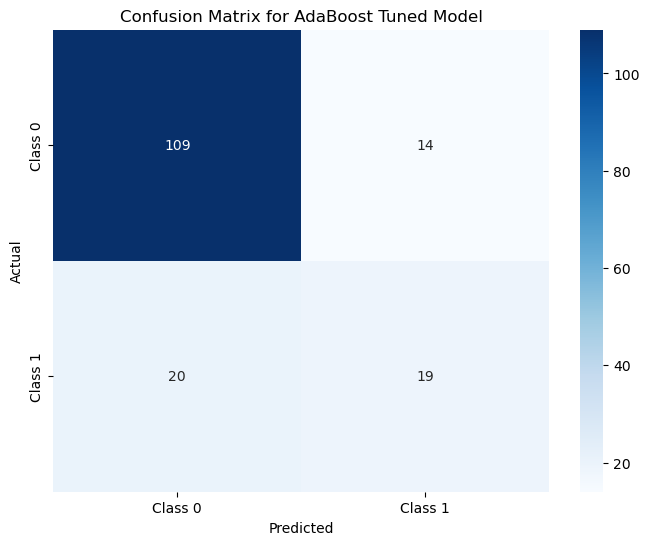

In [132]:
# Generate CM
conf_matrix = confusion_matrix(y_test, y_pred_ada_boost_tuned)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost Tuned Model')
plt.show()


**CLASSIFICATION REPORT AFTER TUNING**

In [133]:
from sklearn.metrics import classification_report

# Print
print("Classification Report for AdaBoost Tuned Model:")
print(classification_report(y_test, y_pred_ada_boost_tuned, zero_division=0))

Classification Report for AdaBoost Tuned Model:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       123
           1       0.58      0.49      0.53        39

    accuracy                           0.79       162
   macro avg       0.71      0.69      0.70       162
weighted avg       0.78      0.79      0.78       162



**CLASSIFICATION REPORT BEFORE TUNING**

In [134]:
# Print
print("Classification Report for AdaBoost Baseline Model:")
print(classification_report(y_test, y_pred_ada_boost, zero_division=0))

Classification Report for AdaBoost Baseline Model:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       123
           1       0.51      0.56      0.54        39

    accuracy                           0.77       162
   macro avg       0.68      0.70      0.69       162
weighted avg       0.77      0.77      0.77       162



Since the overall score of **AdaBoost Baseline model is better, it will be used for the deployment**.

# 09 Model Saving

In [135]:
# Model Inference
import pickle # save model
import json # save cols

In [136]:
# Save model
with open('ada_pipeline.pkl','wb') as file_1: #wb = write binary
    pickle.dump(best_model_pipeline,file_1)

# Save cols
with open('num_cols.txt','w') as file_2: #w = write
    json.dump(num_cols,file_2)

with open('cat_cols.txt','w') as file_3: #w = write
    json.dump(cat_cols,file_3)

with open('all_cols.txt','w') as file_4: #w = write
    json.dump(all_cols,file_4)
